## Homework 6 


Name: Dan Jang

Comments for instructor/grader:


### Exercise 6.3 LU Decomposition

[If you haven't already completed in HW5]

This exercise invites you to write your own
program to solve simultaneous equations using the method of LU
decomposition.

**a)** Starting, if you wish, with the program for Gaussian elimination in
  Example 6.1 on page 218, write a Python function that calculates the LU
  decomposition of a matrix.  The calculation is same as that for Gaussian
  elimination, except that at each step of the calculation you need to
  extract the appropriate elements of the matrix and assemble them to form
  the lower diagonal matrix __L__ of Eq. (6.32).  Test your function by
  calculating the LU decomposition of the matrix from Eq. (6.2), then
  multiplying the __L__ and __U__ you get and verifying that you
  recover the original matrix once more.

In [ ]:
from gaussxw import gaussxwab

2

**Pts /10**

**b)** Build on your LU decomposition function to create a complete program
  to solve Eq. (6.2) by performing a double substitution as described
  in this section. 

In [ ]:
#Type your code here

**Pts /10**

**c)**  Solve the same equations using the function _solve_ from the _numpy_ package and verify that you get the same answer either way.

**Pts /5**

**Total Exercise Pts /25**

### Exercise 6.8 QR algorithm

In this exercise you'll write a
program to calculate the eigenvalues and eigenvectors of a real symmetric
matrix using the QR algorithm.  The first challenge is to write a program
that finds the QR decomposition of a matrix.  Then we'll use that
decomposition to find the eigenvalues.

The details of this problem are quite long so refer to the write-up for the exercise in the textbook.

**b)** Write a Python function that takes as its argument a real square
  matrix __A__ and returns the two matrices __Q__ and __R__
  that form its QR decomposition.  As a test case, try out your function on
  the matrix:
  
  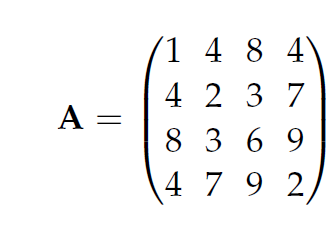
  
  Print out __Q__ and __A__. Check your code by multiplying and printing the product __Q__ __R__ to
recover the original matrix __A__. You can use the numpy function *np.dot()* to perform the matrix multiplication. 

In [ ]:
## Type your code here. 

**Pts /10**

**c)** Using your function, write a complete program to calculate the
  eigenvalues and eigenvectors of a real symmetric matrix using the QR
  algorithm.  Continue the calculation until the magnitude of every
  off-diagonal element of the matrix is smaller than $10^{-6}$.  Test your
  program on the example matrix above.  You should find that the
  eigenvalues are $1$, $21$, $-3$, and$-8$. Print out the eigenvectors and eigenvalues.

In [ ]:
## Type code here  

**Pts /10**

**d)** Verify that your eigenvalues and eigenvectors satisfy the eigenvector equation:

$
\mathbf{A}{v}=\lambda\mathbf{v}
$

by computing and printing both sides of the equation. 

In [ ]:
# type code here

**Pts /5**

**e)** Verify  your eigenvectors and eigenvalues again, this time using the  *numpy.linalg* function *eigh()*. Refer to its online documentation https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
Print out compare the eigenvectors and eigenvalues you calculated with your algorithm and with *eigh()*.

In [ ]:
# Type your code here

**Pts /5**

**Total Exercise Pts /30**

### Exercise 6.10 Relaxation method

Consider the equation $x = 1 − e^{−cx}$, where $c$ is a known parameter and $x$ is
unknown. This equation arises in a variety of situations, including the physics of contact processes,
mathematical models of epidemics, and the theory of random graphs.

a) Write a program to solve this equation for $x$ using the relaxation method for the case
$c = 2$. Calculate your solution to an accuracy of at least $10^{−6}$.

In [ ]:
# Type code here

**/5 pts**

Modify your program to calculate the solution for values of $c$ from $0$ to $3$ in steps of $0.01$
and make a plot of $x$ as a function of $c$. You should see a clear transition from a regime
in which $x = 0$ to a regime of nonzero $x$. This is another example of a phase transition.
In physics this transition is known as the percolation transition; in epidemiology it is the
epidemic threshold.

In [ ]:
# Type code here

**/5 pts**

**Total /10 pts**

### Total HW Pts /65